# Perceptual Decision making task
Consider the task of perceptual decision-making integrating information. The idea is to replicate the previous procedure and now to train an RNN that can reproduce this task in a supervised manner.

1) Task parametrization.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy import signal
from numpy.random import seed
from scipy import signal

start_time = time.time()

def generate_trials(size,mem_gap):
    seed(2)
    first_in         = 50   #time to start the first stimulus
    stim_dur         = 100  #stimulus duration
    stim_noise       = 1    #noise
    var_delay_length = 0    #change for a variable length starting position
    out_gap          = 250  #how much lenth add to the sequence duration
    sample_size      = size #sample size
    rec_noise        = 0

    xor_seed_A = np.array([[0],[1]])

    xor_y            = np.array([0,1])
    seq_dur          = first_in+stim_dur+mem_gap+var_delay_length+(out_gap-mem_gap)
    win              = signal.hann(10)

    if var_delay_length == 0:
        var_delay = np.zeros(sample_size, dtype=int)
    else:
        var_delay = np.random.randint(var_delay_length, size=sample_size) + 1
    second_in = first_in + stim_dur + mem_gap

    out_t          = mem_gap+ first_in+stim_dur
    x              = np.arange(seq_dur)
    trial_types    = np.random.randint(2, size=sample_size)
    x_train_       = np.zeros((sample_size, seq_dur, 1))
    x_train        = np.zeros((sample_size, seq_dur, 1))
    y_train        = 0.045* np.ones((sample_size, seq_dur, 1))

    for ii in np.arange(sample_size):
        x_train_[ii, first_in:first_in + stim_dur, 0]   = xor_seed_A[trial_types[ii], 0] * np.random.randn(stim_dur)
        x_train[ii, first_in:first_in + stim_dur, 0]    = signal.convolve(x_train_[ii, first_in:first_in + stim_dur, 0], win, mode='same') / sum(win)

        y_train[ii, out_t + var_delay[ii]:, 0]  = np.sign(scipy.integrate.simps(x_train[ii, first_in:first_in + stim_dur, 0], x=None, dx=1, axis=-1, even='avg'))
    mask = np.zeros((sample_size, seq_dur))

    for sample in np.arange(sample_size):
        mask[sample,:] = [1 for y in y_train[sample,:,:]]

    y_train = y_train   # + stim_noise * np.random.randn(sample_size, seq_dur, 1)

    print("--- %s seconds to generate learning dataset---" % (time.time() - start_time))
    return(x_train, y_train,mask,seq_dur)

--- 7.256987571716309 seconds to generate learning dataset---


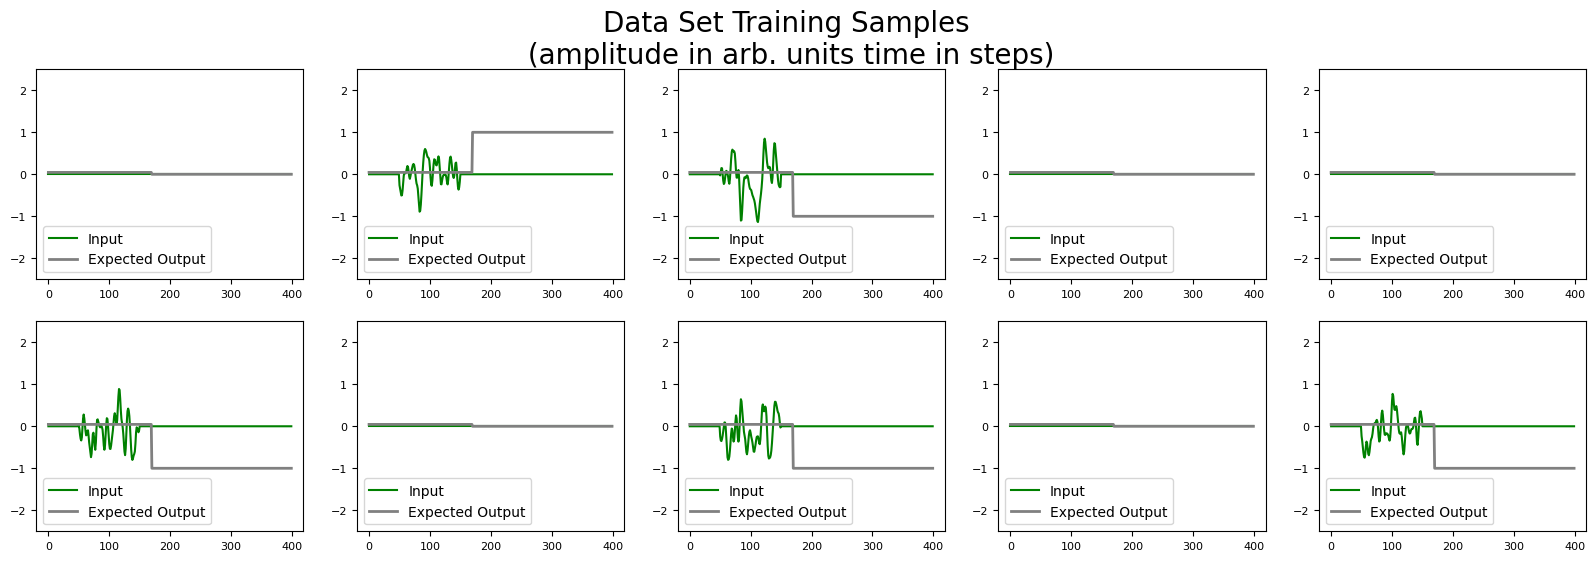

In [10]:
#To test the rule that you want to teach

sample_size=10

x_train,y_train, mask,seq_dur = generate_trials(sample_size,20)

fig     = plt.figure(figsize=(20,6))
fig.suptitle("Data Set Training Samples\n (amplitude in arb. units time in steps)",fontsize = 20)
for ii in np.arange(10):
    plt.subplot(2, 5, ii + 1)
    plt.plot(x_train[ii, :, 0],color='g',label="Input")
    plt.plot(y_train[ii, :, 0],color='gray',linewidth=2,label="Expected Output")
    plt.ylim([-2.5, 2.5])
    plt.legend(fontsize= 10,loc=3)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
figname = "data_set_perceptual_dm.png"
plt.savefig(figname,dpi=200)
plt.show()